In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib.request
import time


#taking user input
print("What do you want to download?")
download = input()
site = 'https://www.google.com/search?tbm=isch&q='+download


#providing driver path
driver = webdriver.Firefox(executable_path = 'C:\\Users\\kyle\\Development\\geckodriver.exe')

#passing site url
driver.get(site)


#if you just want to download 10-15 images then skip the while loop and just write
#driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")


#below while loop scrolls the webpage 7 times(if available)
num_scrolls = 8
i = 0

while i<num_scrolls:
	#for scrolling page
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
    
    try:
		#for clicking show more results button
        driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[5]/input").click()
    except Exception as e:
        pass
    time.sleep(5)
    i+=1

#parsing
soup = BeautifulSoup(driver.page_source, 'html.parser')


#closing web browser
driver.close()


#scraping image urls with the help of image tag and class used for images
img_tags = soup.find_all("img", class_="rg_i")


count = 0
for i in img_tags:
    #print(i['src'])
    try:
		#passing image urls one by one and downloading
        urllib.request.urlretrieve(i['src'], f"./images/train/{download}/" + str(count)+".jpg")
        count+=1
        print("Number of images downloaded = "+str(count),end='\r')
    except Exception as e:
        pass

What do you want to download?


C:\Users\kyle\AppData\Local\Temp/ipykernel_36920/997840501.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path = 'C:\\Users\\kyle\\Development\\geckodriver.exe')
C:\Users\kyle\AppData\Local\Temp/ipykernel_36920/997840501.py:34: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[5]/input").click()


In [2]:
!pip install selenium

  Using cached wsproto-1.0.0-py3-none-any.whl (24 kB)


(228, 221, 3)


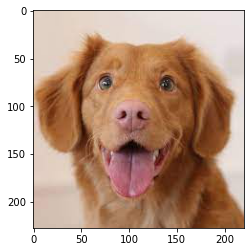

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

show_image("./images/dog/0.jpg")


In [2]:
# from tensorflow.keras.preprocessing import image as image_utils
# from tensorflow.keras.applications.vgg16 import preprocess_input

# def load_and_process_image(image_path):
#     # Print image's original shape, for reference
#     print('Original image shape: ', mpimg.imread(image_path).shape)
    
#     # Load in the image with a target size of 224, 224
#     image = image_utils.load_img(image_path, target_size=(224, 224))
#     # Convert the image from a PIL format to a numpy array
#     image = image_utils.img_to_array(image)
#     # Add a dimension for number of images, in our case 1
#     image = image.reshape(1,224,224,3)
#     # Preprocess image to align with original ImageNet dataset
#     image = preprocess_input(image)
#     # Print image's shape after processing
#     print('Processed image shape: ', image.shape)
#     return image

# processsed_img = load_and_process_image("./images/dog/0.jpg")
